<a href="https://colab.research.google.com/github/ibadurrehman1/Hand_written_Digit_recognition/blob/master/Hand_written_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras


In [17]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Input
from keras.datasets import mnist
from keras.optimizers import Adadelta,Adam
from keras.losses import categorical_crossentropy
from keras import backend as k


In [42]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


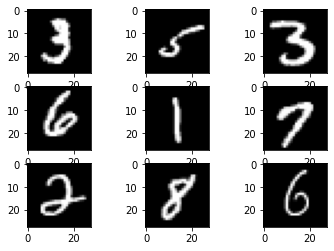

In [44]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(X_train[i+10],cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [45]:
k.image_data_format()

'channels_last'

In [46]:
X_test.shape

(10000, 28, 28)

In [47]:
if k.image_data_format()=="channels_first":
  X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1],X_train.shape[2])
  X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1],X_test.shape[2])
  inp=(1,X_train.shape[1],X_train.shape[2])
elif k.image_data_format()=="channels_last":
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
  inp=(X_train.shape[1],X_train.shape[2],1)


In [48]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

In [49]:
X_train/=255
X_test/=255

In [50]:
from keras.layers.regularization.spatial_dropout3d import Dropout
layer1=Input(shape=inp)
layer2=Conv2D(32,3,activation="relu")(layer1)
layer3=Conv2D(64,3,activation="relu")(layer2)
layer4=MaxPool2D(pool_size=(3,3))(layer3)
layer5=Dropout(0.5)(layer4)
layer6=Flatten()(layer5)
layer7=Dense(units=250,activation="relu")(layer6)
layer8=Dense(units=10,activation='softmax')(layer7)

In [51]:
model=Model([layer1],layer8)

In [52]:
from keras.utils import to_categorical
y_test=to_categorical(y_test)
y_train=to_categorical(y_train)

In [53]:
from tensorflow.python import metrics
from keras.engine.training import optimizers
model.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=["accuracy"])

In [54]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                           

In [55]:
history=model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1369 - accuracy: 0.9573
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9828
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0405 - accuracy: 0.9871
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0308 - accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9943
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9951
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.014

In [56]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9935


[0.032447122037410736, 0.9934999942779541]

In [57]:
history.history

{'loss': [0.13689248263835907,
  0.05326361581683159,
  0.04049406573176384,
  0.030781494453549385,
  0.0258429367095232,
  0.021551283076405525,
  0.01876477338373661,
  0.017393741756677628,
  0.01528144534677267,
  0.014284422621130943,
  0.012070012278854847,
  0.012896306812763214,
  0.011236468330025673,
  0.010993593372404575,
  0.009861639700829983,
  0.009106149896979332,
  0.009586137719452381,
  0.008144567720592022,
  0.008566012606024742,
  0.007862593047320843],
 'accuracy': [0.9572833180427551,
  0.982783317565918,
  0.9871000051498413,
  0.9897833466529846,
  0.9915000200271606,
  0.9930499792098999,
  0.9937499761581421,
  0.9943333268165588,
  0.9951333403587341,
  0.9952333569526672,
  0.9960833191871643,
  0.9957500100135803,
  0.9962833523750305,
  0.9965166449546814,
  0.9967833161354065,
  0.996749997138977,
  0.996666669845581,
  0.9975666403770447,
  0.9974333047866821,
  0.9975333213806152]}

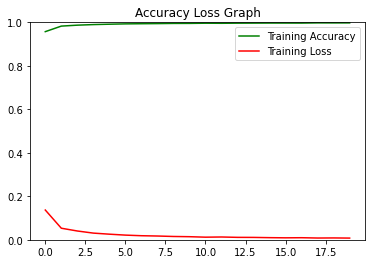

In [58]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training Accuracy",color='g')
plt.plot(history.history['loss'],label="Training Loss",color='r')
plt.legend()
plt.title("Accuracy Loss Graph")
plt.ylim([0,1])
plt.show()


In [59]:
import numpy as np
prediction=model.predict(X_test[22:23])
print(np.argmax(np.round(prediction)))

1/1 [==============================] - 0s 75ms/step
6


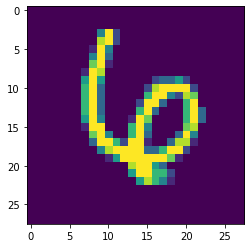

In [60]:
plt.imshow(X_test[22])

In [61]:
import cv2
import numpy as np

def prediction(path):
  image = cv2.imread(path)

  # Resize the image
  resized_image = cv2.resize(image, (28, 28))

  # Convert the resized image to grayscale
  gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

  # Reshape the grayscale image to have a shape of (28, 28, 1)
  final_image = np.reshape(gray_image, (28, 28, 1))
  final_image=final_image.astype('float32')
  final_image/=255
  plt.imshow(final_image)
  pred = model.predict(final_image.reshape(1, 28, 28, 1))
  print(pred.argmax())

1/1 [==============================] - 0s 22ms/step
5


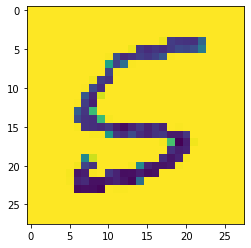

In [62]:
prediction("/content/5.jpg")

1/1 [==============================] - 0s 25ms/step
4


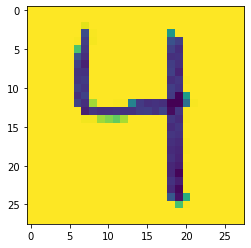

In [65]:
prediction("/content/4.jpg")